**1. Multiple linear regression** 

**(a)**

In [19]:
#a
import pandas as pd
auto = pd.read_csv("auto.csv",na_values="?")
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**(b)**

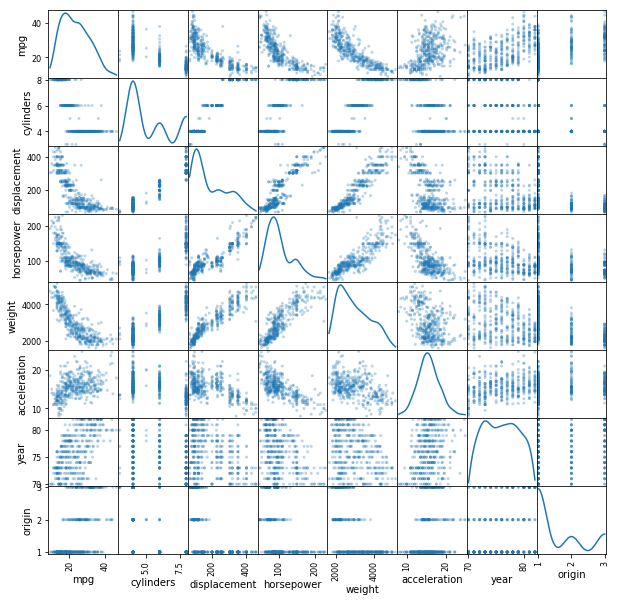

In [21]:
#b
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt

%matplotlib inline
scatter_matrix(auto, alpha=0.3, figsize=(10, 10), diagonal="kde")
plt.show()

**(c)**

In [22]:
#c
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


**(d)**

In [28]:
#d.i.
import statsmodels.api as sm
auto['constant']=1
reg = sm.OLS(endog=auto['mpg'], exog=auto[['cylinders', 'displacement','horsepower','weight','acceleration','year','origin','constant']], missing='drop')
result=reg.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        16:45:58   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1


(i)
From the above table, we can know that $\beta_0, \beta_2, \beta_4, \beta_6$ and $\beta_7$ are significant at the 1% level, which means displacement weight, year, and origin as well as intercept are statistically significant variables at the 1% level .

(ii)
From the above table, we can know that $\beta_1,\beta_3$ and $\beta_5$ are not statistically significant at the 10% level, which means the variable cylinders, horsepower and acceleration are not statistically significant at the 10% level .

(iii)
The estimated cofficient $\beta_6$ means that a vehicle model will travel about 0.7508 miles more per gallon on average if this vehicle model was produced 1 year later. 

**(e)**

(i) The three variables that look most likely to have a nonlinear relationship with $mpg_i$ I think are displacement, horsepower and weight.

In [35]:
#i.
import numpy as np
auto['horsepower^2']=np.square(auto['horsepower'])
auto['displacement^2']=np.square(auto['displacement'])
auto['weight^2']=np.square(auto['weight'])
auto['acceleration^2']=np.square(auto['acceleration'])
reg2 = sm.OLS(endog=auto['mpg'], exog=auto[['constant','cylinders', 'displacement','horsepower','weight','acceleration','year','origin','horsepower^2','displacement^2','weight^2','acceleration^2']], missing='drop')

result2=reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        21:46:47   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          20.1084      6.696      3.

(ii)The adjusted R-squared of the new model is 0.866. It's higher than the adjusted R-squared from part (d), which is 0.818.

(iii) Compared to those of the previous model, the statistical significance of the $displacement_i$ variable coefficient and the coefficient on its squared term both decreased and they are not significant at the 10% level.

(iv) The statistical significance of the coefficient on cylinders decreases and is not siginificant at the 10% level.

**(f)**

In [40]:
#f
print("the predicted mpg will be:",result2.predict(exog=[1,6,200,100,3100,15.1,99,1,100**2,200**2,3100**2,15.1**2]))

the predicted mpg will be: [38.7321111]


**2. Classiﬁcation problem: KNN by hand and in Python**

**(a)**

In [43]:
data=pd.DataFrame({"X1":[0,2,0,0,-1,1], "X2":[3,0,1,1,0,1],
                 "X3":[0,0,3,2,1,1],"Y":["Red","Red","Red","Green","Green","Red"]})
data["distance"]=np.sqrt(data["X1"]**2+data["X2"]**2+data["X3"]**2)
data

,X1,X2,X3,Y,distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


**(b)**

The nearest neighbor of our test point(0,0,0) is the 5th observation, which is green. Therefore, our KNN oprediction with K = 1 is green.

**(c)**

The 3 nearest neighbor of our test point(0,0,0) are the 5th, 6th and 2nd observations. 2 of the 3 observations are red. Therefore, our KNN oprediction with K = 3 is red.

**(d)**

A highly nonlinear Bayes boundary would suggest that there is less advantage to generalizing further due to high variance, so the best value for K would be small.

**(e)**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
neighbor=knn.fit(data[["X1","X2","X3"]], data["Y"])
print("The KNN estimate of the test point (1,1,1) with K = 2 is",
      neighbor.predict([(1,1,1)]))

The KNN estimate of the test point (1,1,1) with K = 2 is ['Green']


**3. Multivariable logistic (logit) regression**

In [48]:
auto['mpg_high']=np.where(auto['mpg']>auto['mpg'].median(),1,0)

**(a)**

In [52]:
logit = sm.Logit(auto['mpg_high'], auto[['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin']],missing="drop")
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.189320
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 19 Feb 2019   Pseudo R-squ.:                  0.7265
Time:                        22:26:57   Log-Likelihood:                -74.213
converged:                       True   LL-Null:                       -271.30
                                        LLR p-value:                 4.235e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -22.7150      6.140     -3.700      0.000     -34.749     -10.681
cylinders       -0.0633

The regressors that have coefficients that are statistically significant at the 5% level include weight and year.

**(b)**

In [57]:
from sklearn.model_selection import train_test_split
auto.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(auto[['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin']],auto['mpg_high'], test_size = 0.5, random_state=10)

**(c)**

In [63]:
from sklearn.linear_model import LogisticRegression

logit2 = LogisticRegression(random_state=10).fit(X_train, y_train)
b0,b1,b2,b3,b4,b5,b6,b7=logit2.coef_[0]
coef = pd.DataFrame({"coefficient":['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin'], "estimate":[b0,b1,b2,b3,b4,b5,b6,b7]})
print(coef)

    coefficient  estimate
0      constant -0.051614
1     cylinders -0.372175
2  displacement  0.005731
3    horsepower -0.048376
4        weight -0.005011
5  acceleration -0.239298
6          year  0.306803
7        origin -0.003683


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**(d)**

In [67]:
y_pred = logit2.predict(X_test)
print("the predicted values of mpg_high for the test set is:\n",y_pred)

the predicted values of mpg_high for the test set is:
 [1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0]


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[89, 16],
       [10, 81]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       105
           1       0.84      0.89      0.86        91

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The F1-scores are almost the same. Therefore, this model predicts equally well on low mpg and high mpg.